**Homework 1: Environmental Objectives in Water Management**



In [1]:
#Load Data
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
data = np.loadtxt('Input_data.csv', delimiter=',', skiprows=1)

In [2]:
time = pd.date_range('2018-10-01', '2021-09-30')
time


DatetimeIndex(['2018-10-01', '2018-10-02', '2018-10-03', '2018-10-04',
               '2018-10-05', '2018-10-06', '2018-10-07', '2018-10-08',
               '2018-10-09', '2018-10-10',
               ...
               '2021-09-21', '2021-09-22', '2021-09-23', '2021-09-24',
               '2021-09-25', '2021-09-26', '2021-09-27', '2021-09-28',
               '2021-09-29', '2021-09-30'],
              dtype='datetime64[ns]', length=1096, freq='D')

In [3]:
flow_cfs = data[:,0]
ag_demand = data[:,1]
urban_demand = data[:,2]
new_ag = data[:,3]


In [4]:
#Create table from csv data

import pandas as pd
data1 = pd.read_csv("Input_data.csv", parse_dates=[0])

data1

,Flow_cfs,Ag_demand_cfs,Urban_demand_cfs,new ag
0,2897,5000,2153.303076,5000
1,3008,5000,2153.807363,5000
2,3483,5000,2154.311649,5000
3,3605,5000,2154.815935,5000
4,2884,5000,2155.320222,5000
...,...,...,...,...
1091,2464,5000,2151.285930,3000
1092,2084,5000,2151.790217,3000
1093,2482,5000,2152.294503,3000
1094,2302,5000,2152.798790,3000


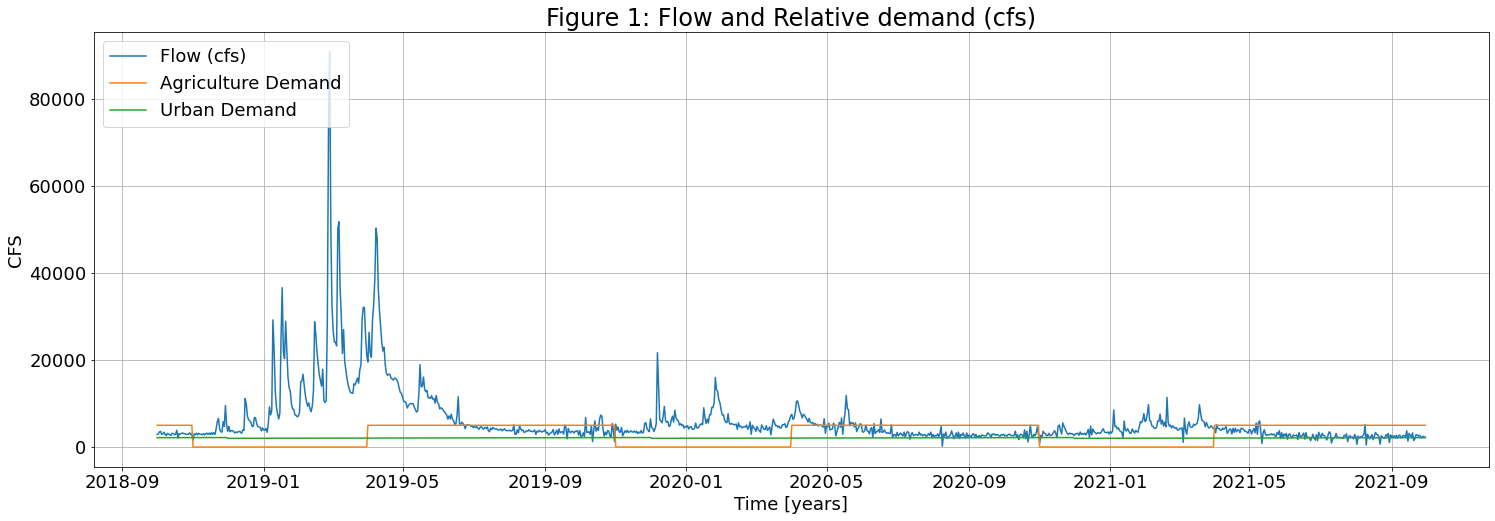

In [5]:
#Plot inflow, agriculture demand and urban demand.
plt.rcParams.update({'font.size': 18})

plt.figure(figsize=(25.0,8))
plt.title('Figure 1: Flow and Relative demand (cfs)',{'fontsize':24})
plt.plot(time,flow_cfs,label='Flow (cfs)')
plt.plot(time,ag_demand,label='Agriculture Demand')
plt.plot(time,urban_demand,label='Urban Demand')
plt.legend(loc='upper left')
plt.grid()
plt.xlabel('Time [years]')
plt.ylabel('CFS')
plt.savefig('Flow_and_demand.jpeg')

In [6]:
time_year1 = time[0:92]
flow_cfs_year1 = flow_cfs[0:92]
ag_demand_year1 = ag_demand[0:92]
urban_demand_year1 = urban_demand[0:92]

In [7]:
time_year2 = time[93:457]
flow_cfs_year2 = flow_cfs[93:457]
ag_demand_year2 = ag_demand[93:457]
urban_demand_year2 = urban_demand[93:457]

In [8]:
time_year3 = time[458:823]
flow_cfs_year3 = flow_cfs[458:823]
ag_demand_year3 = ag_demand[458:823]
urban_demand_year3 = urban_demand[458:823]

In [9]:
time_year4 = time[824:1097]
flow_cfs_year4 = flow_cfs[824:1097]
ag_demand_year4 = ag_demand[824:1097]
urban_demand_year4 = urban_demand[824:1097]

Text(0, 0.5, 'CFS')

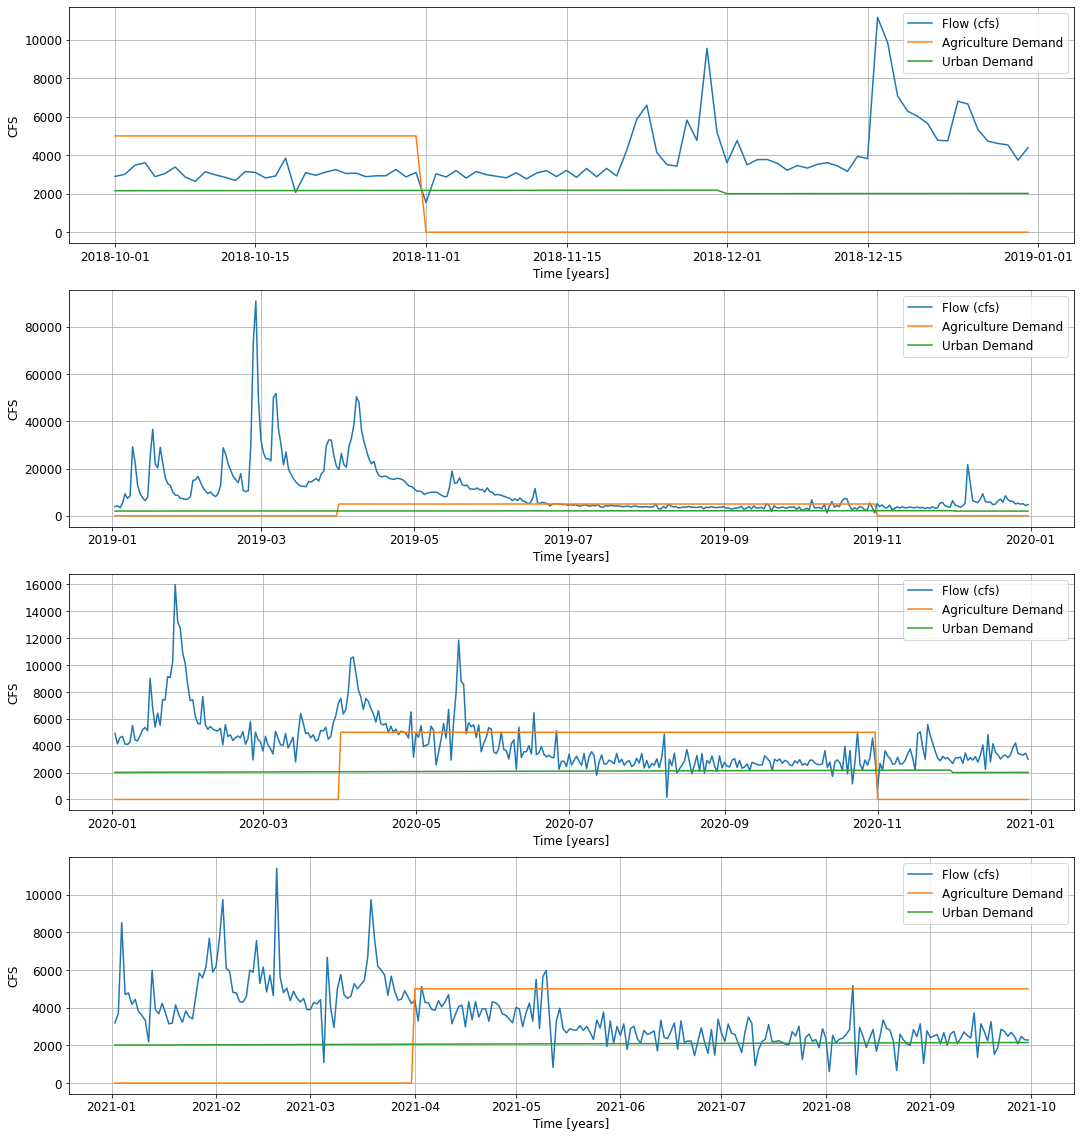

In [10]:
#Separate out flow inflows and demands by year.
plt.rcParams.update({'font.size': 12})

plt.figure(figsize=(18.0,20))
plt.title('Flow and Relative demand (cfs), 2018',{'fontsize':18})
plt.subplot(4,1,1)
plt.plot(time_year1,flow_cfs_year1,label='Flow (cfs)')
plt.plot(time_year1,ag_demand_year1,label='Agriculture Demand')
plt.plot(time_year1,urban_demand_year1,label='Urban Demand')
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('Time [years]')
plt.ylabel('CFS')

plt.subplot(4,1,2)
plt.plot(time_year2,flow_cfs_year2,label='Flow (cfs)')
plt.plot(time_year2,ag_demand_year2,label='Agriculture Demand')
plt.plot(time_year2,urban_demand_year2,label='Urban Demand')
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('Time [years]')
plt.ylabel('CFS')


plt.subplot(4,1,3)
plt.plot(time_year3,flow_cfs_year3,label='Flow (cfs)')
plt.plot(time_year3,ag_demand_year3,label='Agriculture Demand')
plt.plot(time_year3,urban_demand_year3,label='Urban Demand')
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('Time [years]')
plt.ylabel('CFS')


plt.subplot(4,1,4)
plt.plot(time_year4,flow_cfs_year4,label='Flow (cfs)')
plt.plot(time_year4,ag_demand_year4,label='Agriculture Demand')
plt.plot(time_year4,urban_demand_year4,label='Urban Demand')
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('Time [years]')
plt.ylabel('CFS')

In [11]:
#what amount of flow is available if we are pulling directly from daily inflow.
leftover_flow = flow_cfs - (ag_demand + urban_demand)

Text(0, 0.5, 'CFS')

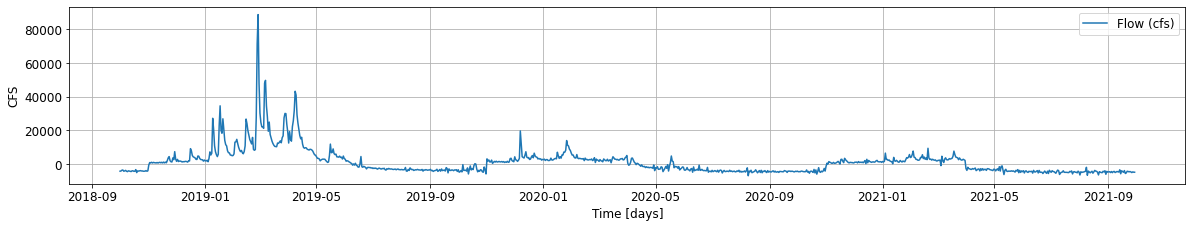

In [12]:
#See where there are deficits
plt.rcParams.update({'font.size': 12})

plt.figure(figsize=(20.0,15))
plt.subplot(4,1,1)
plt.plot(time,leftover_flow,label='Flow (cfs)')
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('Time [days]')
plt.ylabel('CFS')



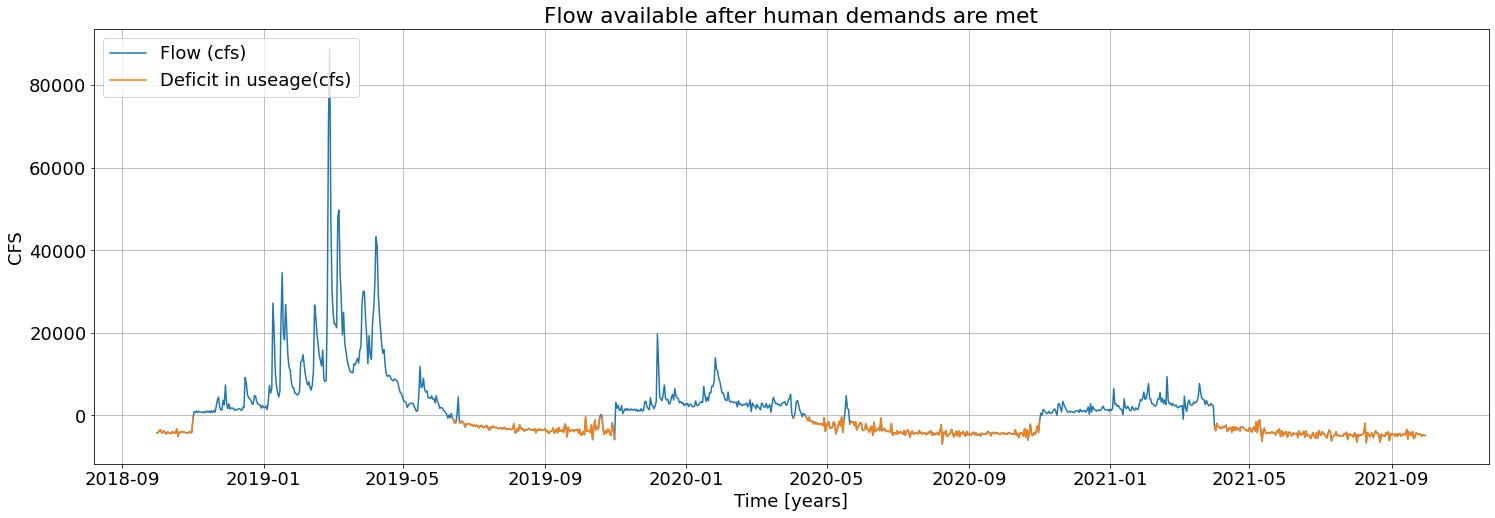

In [13]:
fill = np.ma.masked_where(leftover_flow<5000,leftover_flow)
deficit = np.ma.masked_where(leftover_flow>0,leftover_flow)

plt.rcParams.update({'font.size': 18})

plt.figure(figsize=(25.0,8))
plt.title('Flow available after human demands are met')
plt.plot(time,leftover_flow,label='Flow (cfs)')
plt.plot(time,deficit,label='Deficit in useage(cfs)')
plt.legend(loc='upper left')
plt.grid()
plt.xlabel('Time [years]')
plt.ylabel('CFS')
plt.savefig('leftover_flow.jpeg')

In [14]:
#Create function high and low flows for salmon population
drybaseflow_2018 = sum(flow_cfs[0:30]) / len(flow_cfs[0:30])/2
wetbaseflow_2019 = sum(flow_cfs[31:214]) / len(flow_cfs[31:214])/2
drybaseflow_2019 = sum(flow_cfs[214:367]) / len(flow_cfs[214:367])/2
wetbaseflow_2020 = sum(flow_cfs[368:579]) / len(flow_cfs[368:579])/2
drybaseflow_2020 = sum(flow_cfs[580:733]) / len(flow_cfs[580:733])/2
wetbaseflow_2021 = sum(flow_cfs[734:945]) / len(flow_cfs[734:945])/2
drybaseflow_2021 = sum(flow_cfs[946:1097]) / len(flow_cfs[946:1097])/2

drybaseflow_2018 = np.full((30), drybaseflow_2018)
wetbaseflow_2019 = np.full((187), 3000)
drybaseflow_2019 = np.full((153), 2000)
wetbaseflow_2020 = np.full((211), wetbaseflow_2020)
drybaseflow_2020 = np.full((153), drybaseflow_2020)
wetbaseflow_2021 = np.full((211), wetbaseflow_2021)
drybaseflow_2021 = np.full((151), drybaseflow_2021)

instream_baseflow_2019 = np.append(wetbaseflow_2019,drybaseflow_2019)
instream_baseflow_2020 = np.append(wetbaseflow_2020, drybaseflow_2020)
instream_baseflow_2021 = np.append(wetbaseflow_2021,drybaseflow_2021)
instream_1 = np.append(drybaseflow_2018,instream_baseflow_2019)
instream_2 = np.append(instream_1, instream_baseflow_2020)
instream = np.append(instream_2,instream_baseflow_2021)

In [15]:
#Assuming that flow accumulates if there is an excess, this plots the reservoir storage if all demands are met. 
starting_res = (2000000*43559.9)
res_level = np.cumsum(flow_cfs) - (np.cumsum(ag_demand) + np.cumsum(urban_demand) + np.cumsum(instream))
res_amount = res_level + starting_res

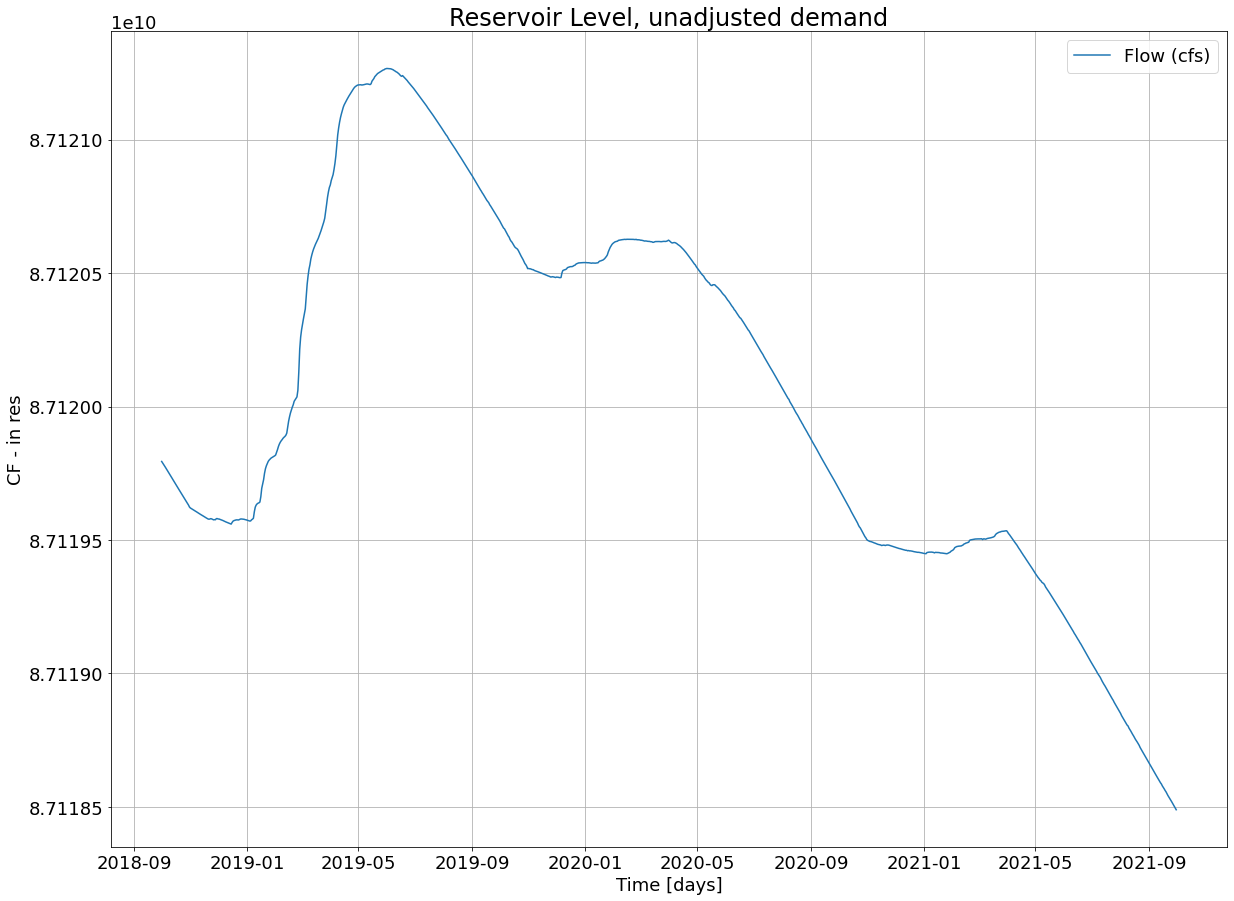

In [16]:
full = (4000000*43559.9)
#Reservoir is never full under these conditions 

plt.figure(figsize=(20.0,15))
plt.title('Reservoir Level, unadjusted demand',{'fontsize':24})
plt.plot(time,res_amount,label='Flow (cfs)')
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('Time [days]')
plt.ylabel('CF - in res')
plt.savefig('reservoir_level.jpeg')

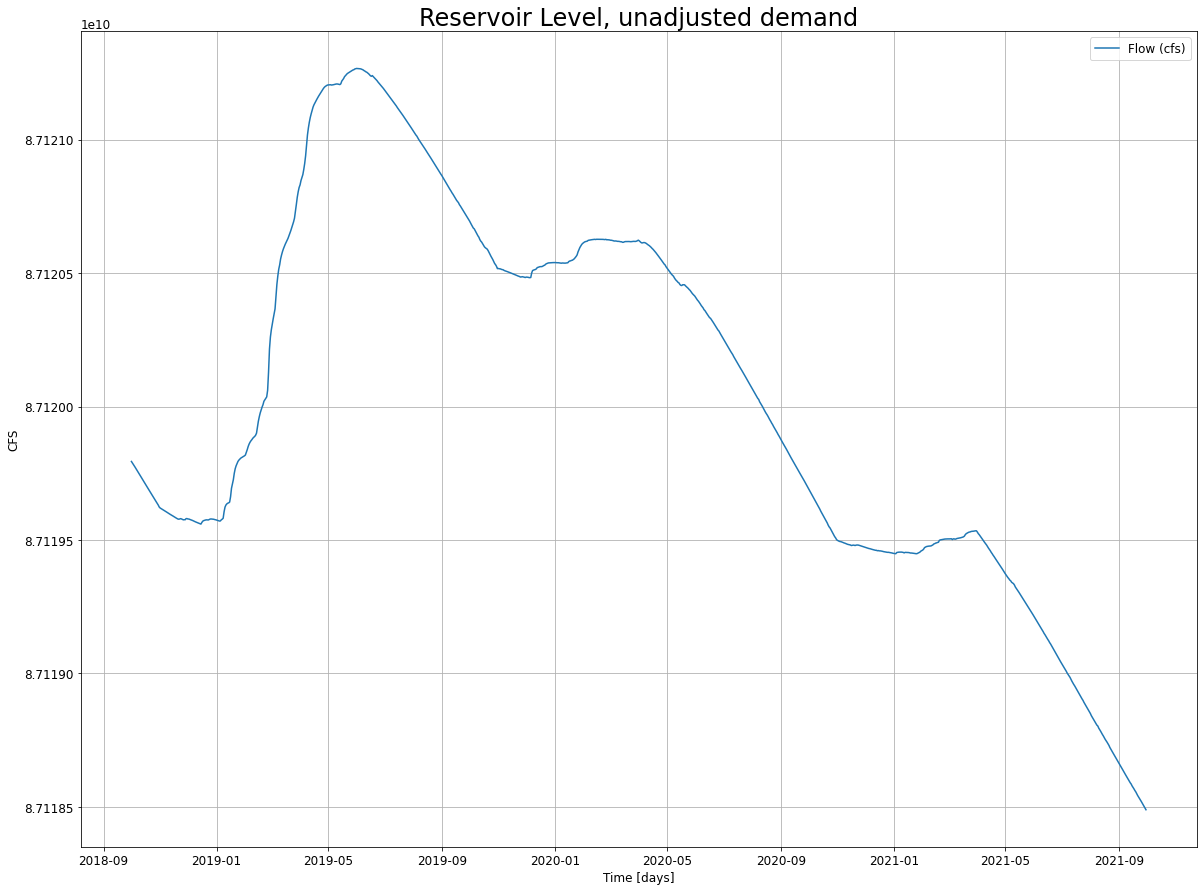

In [17]:
plt.rcParams.update({'font.size': 12})
overfull = np.ma.masked_where(res_amount>174239600000.0,res_amount)


plt.figure(figsize=(20.0,15))
plt.title('Reservoir Level, unadjusted demand',{'fontsize':24})
plt.plot(time,res_amount,label='Flow (cfs)')
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('Time [days]')
plt.ylabel('CFS')
plt.savefig('reservoir_level_unadjusted.jpeg')



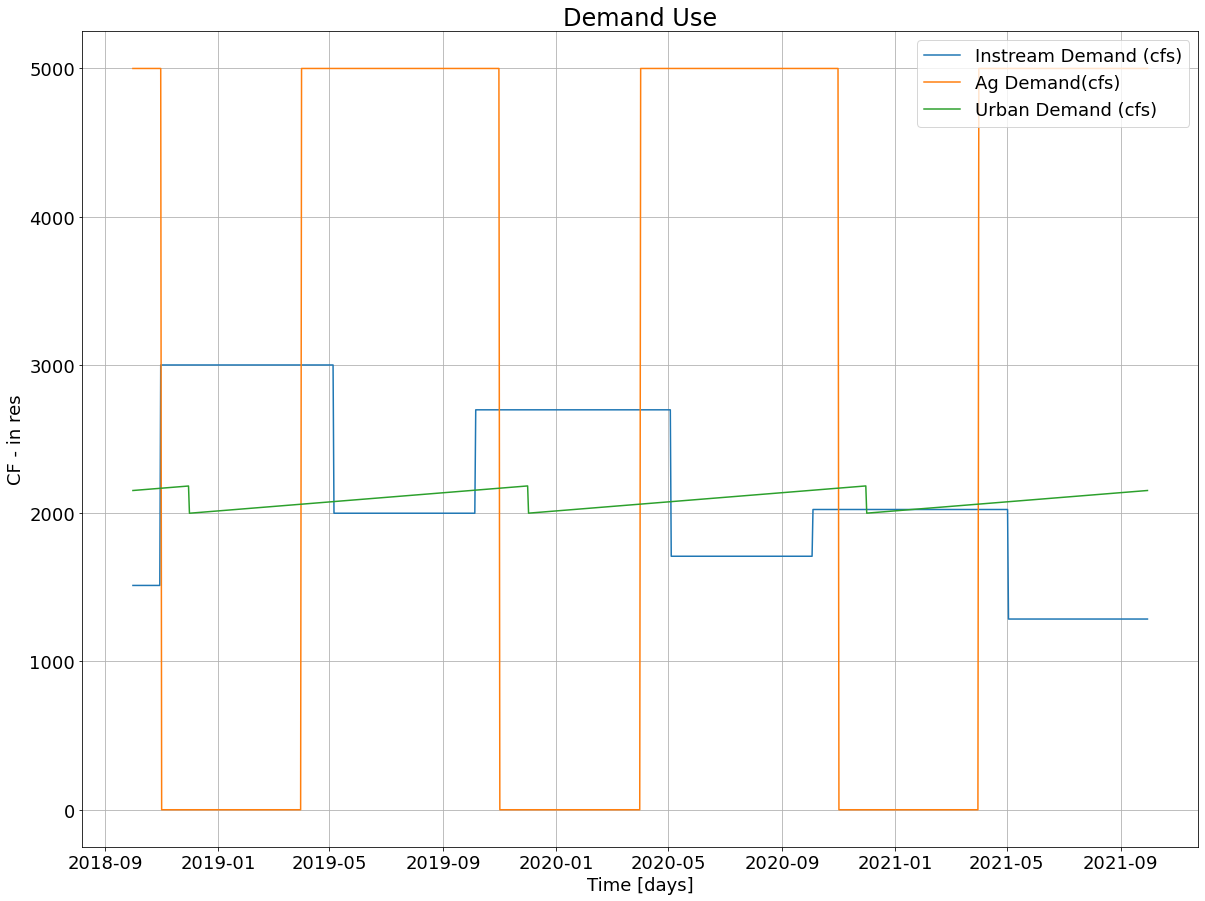

In [18]:
plt.rcParams.update({'font.size': 18})

plt.figure(figsize=(20.0,15))
plt.title('Demand Use',{'fontsize':24})
plt.plot(time,instream,label='Instream Demand (cfs)')
plt.plot(time,ag_demand,label='Ag Demand(cfs)')
plt.plot(time,urban_demand,label='Urban Demand (cfs)')
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('Time [days]')
plt.ylabel('CF - in res')
plt.savefig('Demand_usejpeg')

Text(0, 0.5, 'CFS')

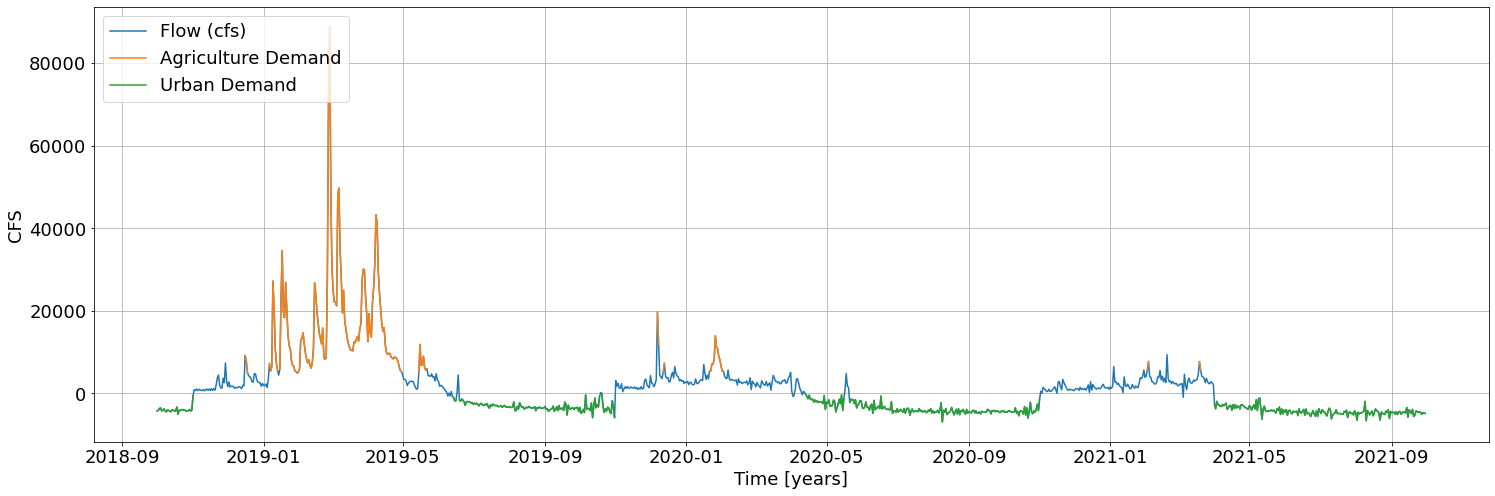

In [19]:
fill = np.ma.masked_where(leftover_flow<5000,leftover_flow)
deficit = np.ma.masked_where(leftover_flow>0,leftover_flow)

plt.rcParams.update({'font.size': 18})

plt.figure(figsize=(25.0,8))
plt.plot(time,leftover_flow,label='Flow (cfs)')
plt.plot(time,fill,label='Agriculture Demand')
plt.plot(time,deficit,label='Urban Demand')
plt.legend(loc='upper left')
plt.grid()
plt.xlabel('Time [years]')
plt.ylabel('CFS')


In [20]:
urban_port=1-(res_amount-urban_demand)/res_amount
ag_port=1-(res_amount-ag_demand)/res_amount
instream_port=1-(res_amount-instream)/res_amount
total_port = 1-(res_amount-(urban_port+ag_port+instream))/res_amount

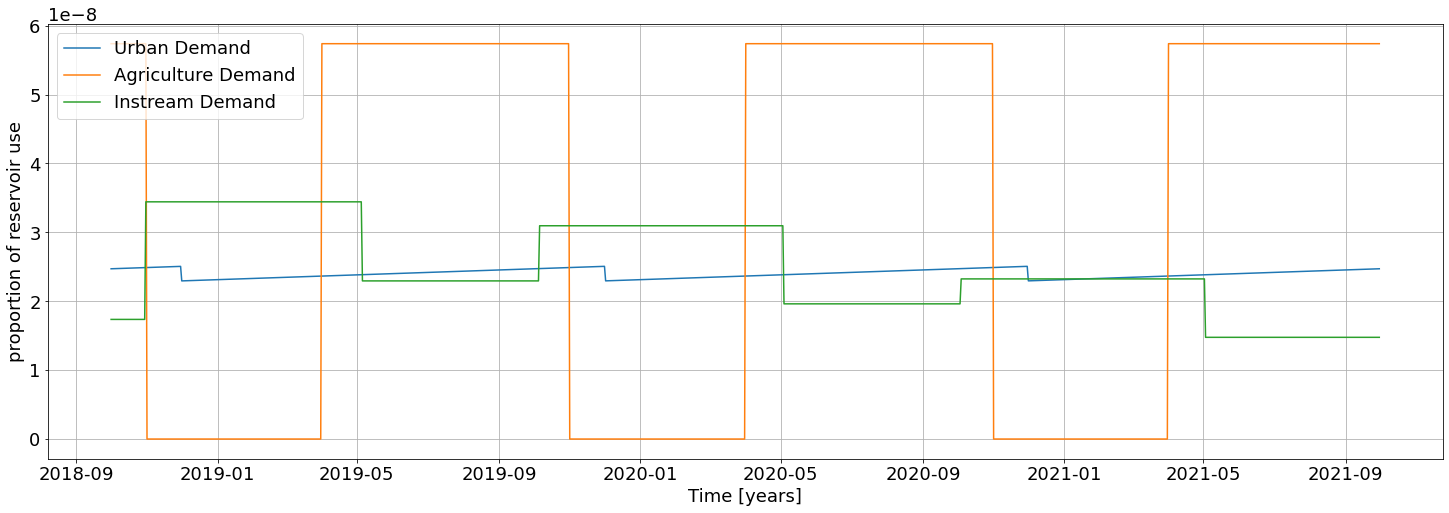

In [21]:
plt.rcParams.update({'font.size': 18})

plt.figure(figsize=(25.0,8))
plt.plot(time,urban_port,label='Urban Demand')
plt.plot(time,ag_port,label='Agriculture Demand')
plt.plot(time,instream_port,label='Instream Demand')
plt.legend(loc='upper left')
plt.grid()
plt.xlabel('Time [years]')
plt.ylabel('proportion of reservoir use')
plt.savefig('reservoir_portion_use_separated.jpeg')

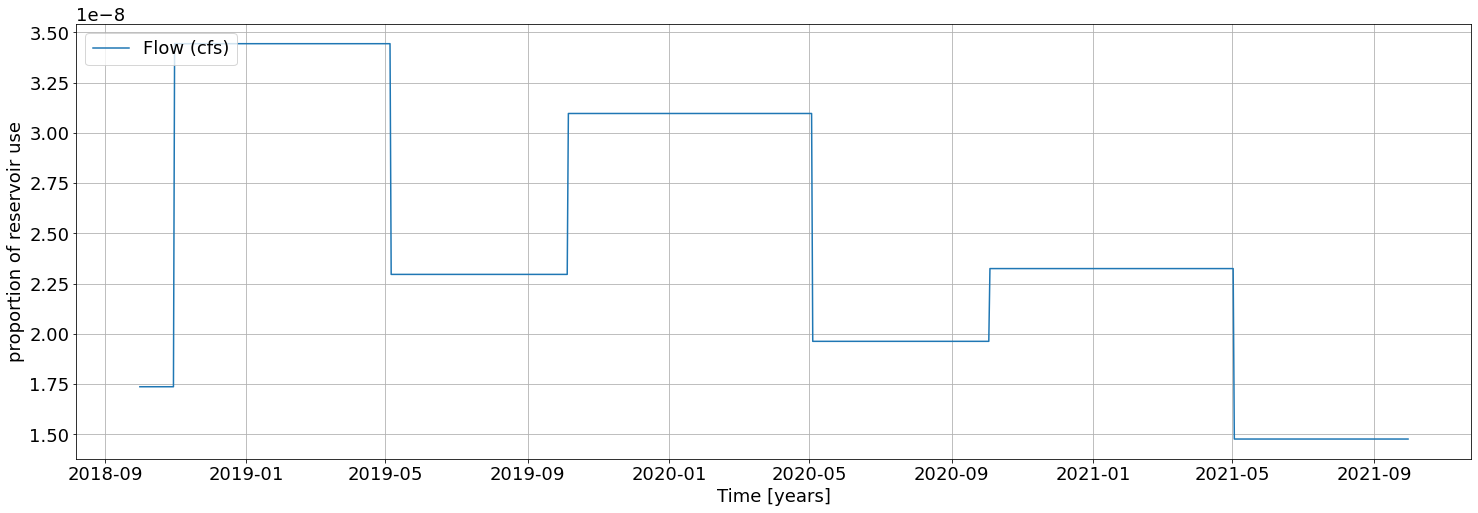

In [22]:
plt.rcParams.update({'font.size': 18})

plt.figure(figsize=(25.0,8))
plt.plot(time,total_port,label='Flow (cfs)')
plt.legend(loc='upper left')
plt.grid()
plt.xlabel('Time [years]')
plt.ylabel('proportion of reservoir use')
plt.savefig('reservoir_portion_use.jpeg')

In [23]:
starting_res = (2000000*43559.9)
res_level = np.cumsum(flow_cfs) - (np.cumsum(new_ag) + np.cumsum(urban_demand) + np.cumsum(instream))
res_amount_adjust = res_level + starting_res

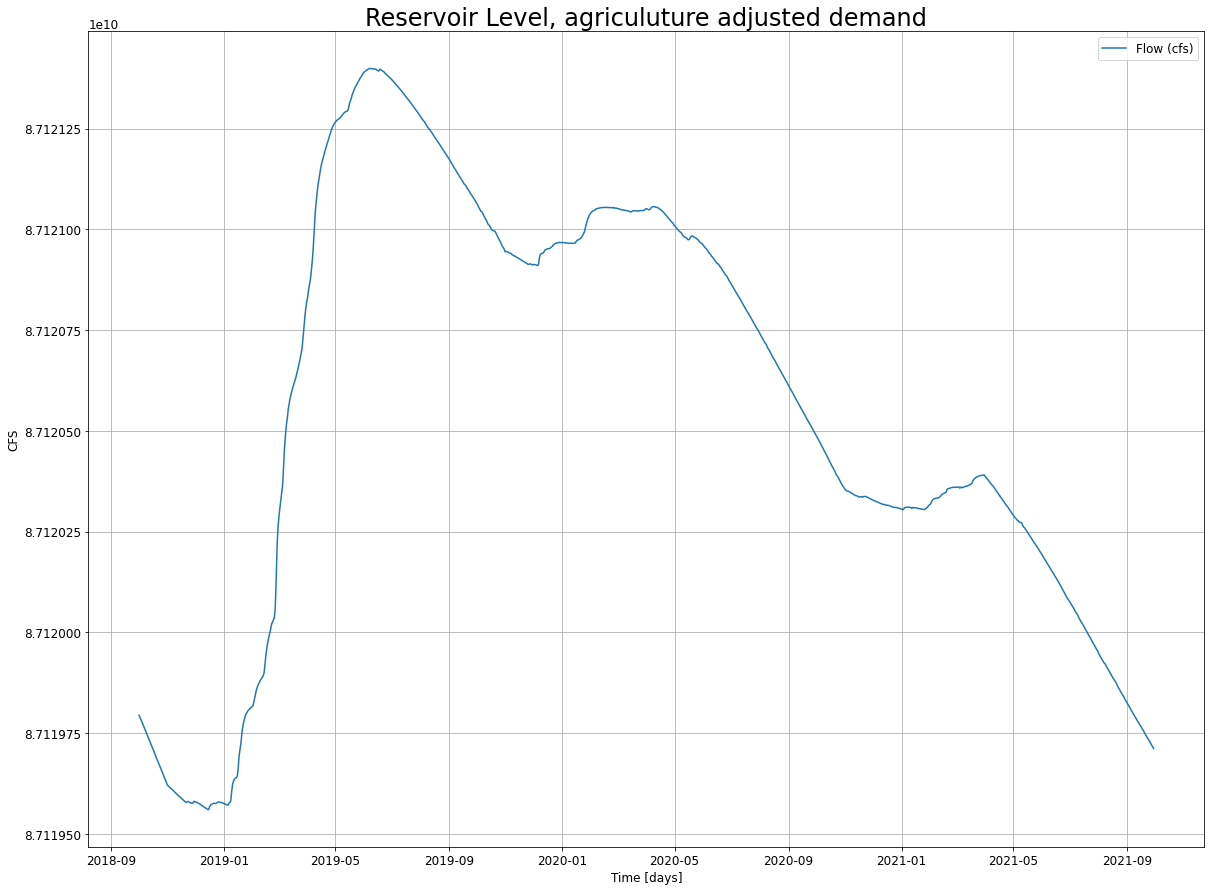

In [24]:

plt.rcParams.update({'font.size': 12})
overfull = np.ma.masked_where(res_amount>174239600000.0,res_amount)


plt.figure(figsize=(20.0,15))
plt.title('Reservoir Level, agriculuture adjusted demand',{'fontsize':24})
plt.plot(time,res_amount_adjust,label='Flow (cfs)')
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('Time [days]')
plt.ylabel('CFS')
plt.savefig('reservoir_level_adjusted.jpeg')